In [ ]:
#!pip install tensorflow

In [83]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates
import pickle

In [22]:
sc=MinMaxScaler(feature_range=(0,1))

In [23]:
#creating a connection for the database
con = sqlite3.connect("db.sqlite3")

In [24]:
#query to display all the tables
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor = con.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('django_migrations',), ('sqlite_sequence',), ('auth_group_permissions',), ('auth_user_groups',), ('auth_user_user_permissions',), ('django_admin_log',), ('django_content_type',), ('auth_permission',), ('auth_group',), ('auth_user',), ('companies_company',), ('companies_dailydata',), ('django_session',)]


In [25]:
#query to read data from the table companies_dailydata
pd.read_sql_query("SELECT * from companies_dailydata", con)

,id,date,open,high,low,close,volume,created_at,updated_at,company_id
0,1,2010-01-04,15.615220,15.678981,15.547723,15.610239,78541293.0,2024-02-02 21:17:07.698665,2024-02-02 21:17:07.698665,3
1,2,2010-01-05,15.620949,15.637387,15.480475,15.541497,120638494.0,2024-02-02 21:17:07.705027,2024-02-02 21:17:07.705027,3
2,3,2010-01-06,15.588072,15.588072,15.102393,15.149715,159744526.0,2024-02-02 21:17:07.710074,2024-02-02 21:17:07.710074,3
3,4,2010-01-07,15.178109,15.193053,14.760922,14.797037,257533695.0,2024-02-02 21:17:07.713072,2024-02-02 21:17:07.713072,3
4,5,2010-01-08,14.744733,15.024933,14.672753,14.994298,189680313.0,2024-02-02 21:17:07.719599,2024-02-02 21:17:07.719599,3
...,...,...,...,...,...,...,...,...,...,...
34714,34715,2024-01-26,404.369995,406.170013,402.429993,403.929993,17803300.0,2024-02-02 21:26:46.770846,2024-02-02 21:26:46.770846,2
34715,34716,2024-01-29,406.059998,409.980011,404.329987,409.720001,24510200.0,2024-02-02 21:26:46.773720,2024-02-02 21:26:46.773720,2
34716,34717,2024-01-30,412.260010,413.049988,406.450012,408.589996,33477600.0,2024-02-02 21:26:46.776551,2024-02-02 21:26:46.776551,2
34717,34718,2024-01-31,406.959991,415.320007,397.209991,397.579987,47871100.0,2024-02-02 21:26:46.779000,2024-02-02 21:26:46.779000,2


In [26]:
#query to read data from the table companies_company
pd.read_sql_query('SELECT * from companies_company',con)

,id,name,symbol
0,1,Apple Inc,AAPL
1,2,Microsoft Corporation,MSFT
2,3,Alphabet INC,GOOG
3,4,Amazon,AMZN
4,5,Nvidia corporation,NVDA
5,6,Meta Platforms,META
6,7,Tesla Inc,TSLA
7,8,Oracle Corporation,ORCL
8,9,Netflix Inc,NFLX
9,10,PepsiCo Inc,PEP


In [27]:
#joining the two tables into one dataframe
data=pd.read_sql_query('''select company.name, company.symbol,
                  data.date, data.open, data.high, data.low, data.close, data.volume
                  from companies_company company join companies_dailydata data on company.id=data.company_id''',con)
data

,name,symbol,date,open,high,low,close,volume
0,Alphabet INC,GOOG,2010-01-04,15.615220,15.678981,15.547723,15.610239,78541293.0
1,Alphabet INC,GOOG,2010-01-05,15.620949,15.637387,15.480475,15.541497,120638494.0
2,Alphabet INC,GOOG,2010-01-06,15.588072,15.588072,15.102393,15.149715,159744526.0
3,Alphabet INC,GOOG,2010-01-07,15.178109,15.193053,14.760922,14.797037,257533695.0
4,Alphabet INC,GOOG,2010-01-08,14.744733,15.024933,14.672753,14.994298,189680313.0
...,...,...,...,...,...,...,...,...
34714,Microsoft Corporation,MSFT,2024-01-26,404.369995,406.170013,402.429993,403.929993,17803300.0
34715,Microsoft Corporation,MSFT,2024-01-29,406.059998,409.980011,404.329987,409.720001,24510200.0
34716,Microsoft Corporation,MSFT,2024-01-30,412.260010,413.049988,406.450012,408.589996,33477600.0
34717,Microsoft Corporation,MSFT,2024-01-31,406.959991,415.320007,397.209991,397.579987,47871100.0


In [28]:
data['date']=pd.to_datetime(data['date'])

In [29]:
data.dtypes

name              object
symbol            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

In [57]:
#functions to split the data into training, validation and test sets

def split_training_data(df):
  training_data=df[(df.date>'2018-01-01') & (df.date<'2022-12-31')]
  training_set=training_data['close'].values.reshape(-1,1)
  return training_data,training_set

def split_validation_data(df):
  validation_data = df[(df.date>'2023-01-01') & (df.date<='2023-12-31')]
  validation_set=validation_data['close'].values.reshape(-1,1)
  return validation_data,validation_set

def split_test_data(df):
  test_data=df[df.date>'2023-12-31']
  real_stock_price=test_data['close'].values.reshape(-1,1)
  return test_data,real_stock_price

In [31]:
def line_plot_viz(training_data,validation_data):
  plt.figure(figsize=(16,4))
  plt.plot(training_data['close'])
  plt.plot(validation_data['close'])
  plt.show()

In [32]:
#Feature scaling using MinMaxScaler
def minmaxScaler(training_set,validation_set):
  training_set_scaled = sc.fit_transform(training_set)
  validation_set_scaled = sc.fit_transform(validation_set)
  return training_set_scaled,validation_set_scaled


In [33]:
#creating input sequences for training
def create_sequences(data,seq_length=60):
    X=[]
    y=[]
    for i in range(seq_length,len(data)):
        X.append(data[i-seq_length:i,0])
        y.append(data[i,0])
    return np.array(X), np.array(y)

In [34]:
def input_for_LSTM(training_set_scaled,validation_set_scaled):
  X_train,y_train = create_sequences(training_set_scaled)
  X_validation,y_validation = create_sequences(validation_set_scaled)

  #reshape inputs for LSTM model
  X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
  X_validation = np.reshape(X_validation,(X_validation.shape[0],X_validation.shape[1],1))
  return X_train,y_train,X_validation,y_validation

In [42]:
#building the model
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

def create_model(X_train):
  regressor = Sequential()

  #first LSTM layer with Dropout regularisation
  regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
  regressor.add(Dropout(0.3))

  regressor.add(LSTM(units=80,return_sequences=True))
  regressor.add(Dropout(0.1))

  regressor.add(LSTM(units=50,return_sequences=True))
  regressor.add(Dropout(0.2))

  regressor.add(LSTM(units=30))
  regressor.add(Dropout(0.3))

  regressor.add(Dense(units=1))

  regressor.compile(optimizer='adam',loss='mean_squared_error')
  return regressor

In [36]:
def stock_price_prediction_training(df):
  training_data,training_set = split_training_data(df)
  validation_data,validation_set = split_validation_data(df)

  #line_plot_viz(training_data,validation_data)

  training_set_scaled,validation_set_scaled = minmaxScaler(training_set,validation_set)
  X_train, y_train, X_validation, y_validation = input_for_LSTM(training_set_scaled,validation_set_scaled)

  model=create_model(X_train)
  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_validation,y_validation))

  # Plot loss and accuracy during training
  plt.figure(figsize=(10, 5))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  return model

In [53]:
#preparing test data
def preparing_test_data(df,test_data):
  dataset_total = pd.concat((df[df.date<='2023-12-31']['close'], test_data['close']),axis=0)
  inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values
  inputs = inputs.reshape(-1,1)
  inputs=sc.transform(inputs)
  X_test=[]
  for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
  return X_test

In [77]:
def viz_results(real_stock_price, predicted_stock_price, company_name):
  date_range = pd.date_range(start='2024-01-01',periods=len(predicted_stock_price), freq='B')

  #visualizing results with month and year on x-axis
  plt.figure(figsize=(16, 6))
  plt.plot(date_range, real_stock_price, color='black', label=f'{company_name} Stock Price')
  plt.plot(date_range, predicted_stock_price, color='green', label=f'Predicted {company_name} Stock Price')
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
  plt.title(f'{company_name} Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel(f'{company_name} Stock Price')
  plt.legend()
  plt.show()

In [62]:
def testing_model(df,model,company_name):
  test_data,real_stock_price = split_test_data(df)
  X_test = preparing_test_data(df,test_data)
  predicted_stock_price = model.predict(X_test)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)
  viz_results(real_stock_price, predicted_stock_price,company_name)
  #return real_stock_price,predicted_stock_price

GOOGLE STOCK PRICE

Epoch 1/100
38/38 [==============================] - 8s 52ms/step - loss: 0.0335 - val_loss: 0.0120
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0084 - val_loss: 0.0121
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0072 - val_loss: 0.0111
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0069 - val_loss: 0.0106
Epoch 5/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0062 - val_loss: 0.0088
Epoch 6/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0061 - val_loss: 0.0128
Epoch 7/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0059 - val_loss: 0.0104
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0062 - val_loss: 0.0083
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0061 - val_loss: 0.0089
Epoch 10/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0056 - val_loss: 0.0149

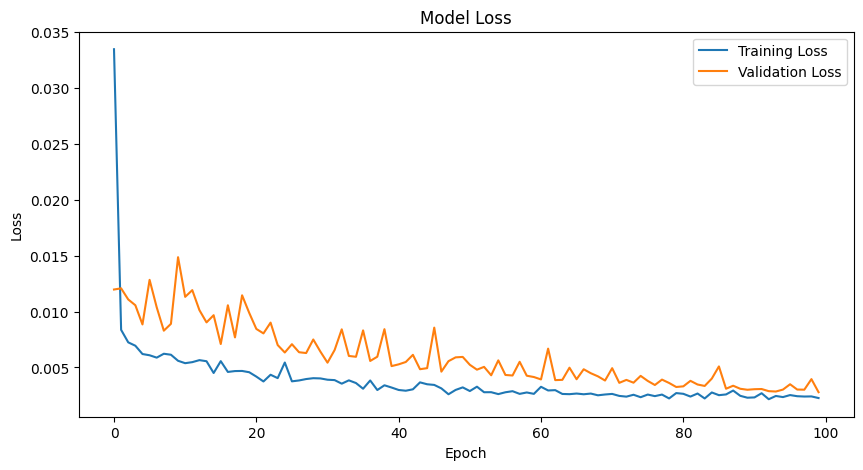

In [58]:
google_df=data[data.symbol=='GOOG']
google_model = stock_price_prediction_training(google_df)

1/1 [==============================] - 0s 25ms/step


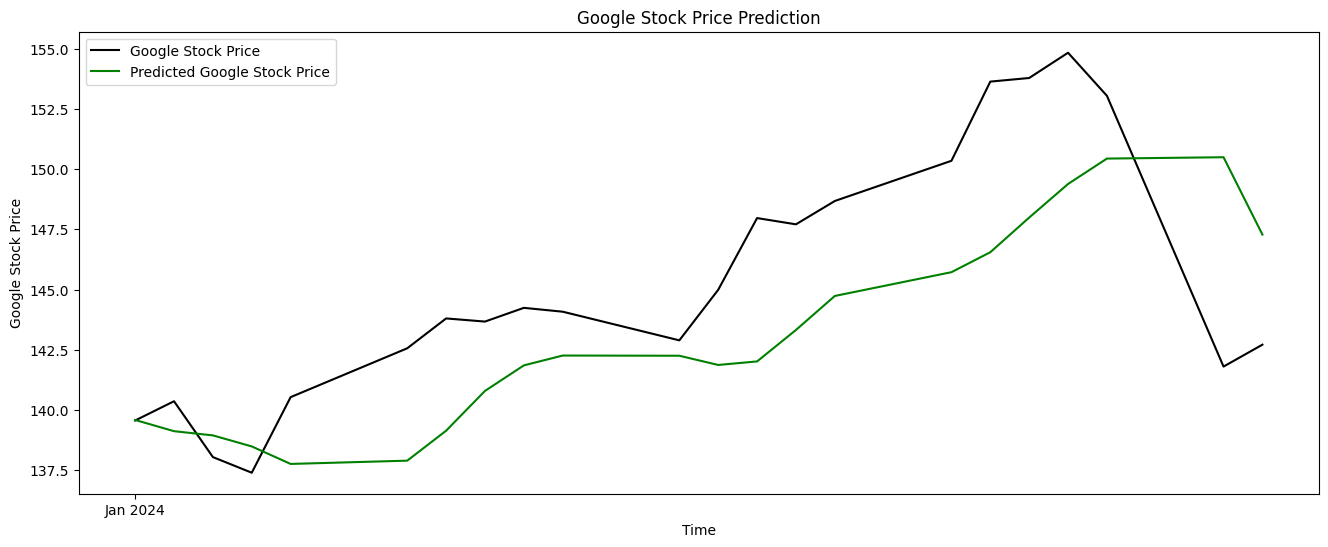

In [63]:
testing_model(google_df, google_model, 'Google')

In [84]:
save_google_model=open('google_model.pkl','wb')
pickle.dump(google_model, save_google_model)
save_google_model.close()

PEPSI STOCK PRICE

Epoch 1/100
38/38 [==============================] - 8s 57ms/step - loss: 0.0364 - val_loss: 0.0248
Epoch 2/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0096 - val_loss: 0.0246
Epoch 3/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0087 - val_loss: 0.0255
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0073 - val_loss: 0.0233
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0080 - val_loss: 0.0232
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0067 - val_loss: 0.0223
Epoch 7/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0066 - val_loss: 0.0213
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0064 - val_loss: 0.0201
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0065 - val_loss: 0.0309
Epoch 10/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0062 - val_loss: 0.0200

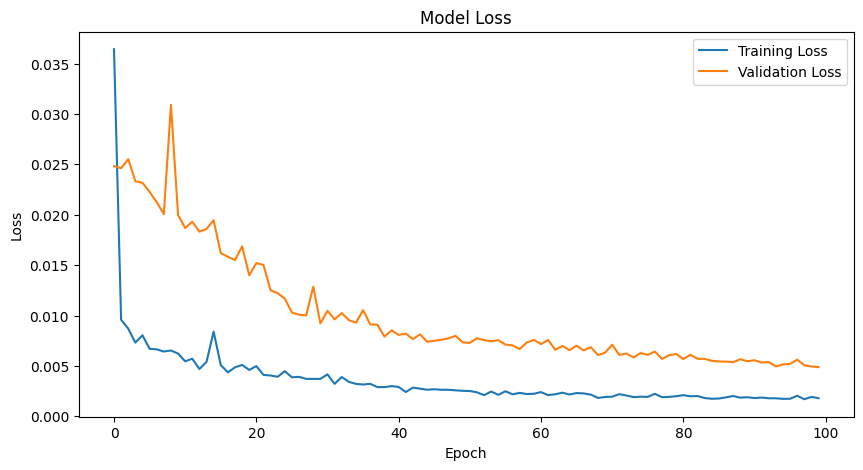

In [64]:
pepsi_df=data[data.symbol=='PEP']
pepsi_model = stock_price_prediction_training(pepsi_df)

1/1 [==============================] - 3s 3s/step


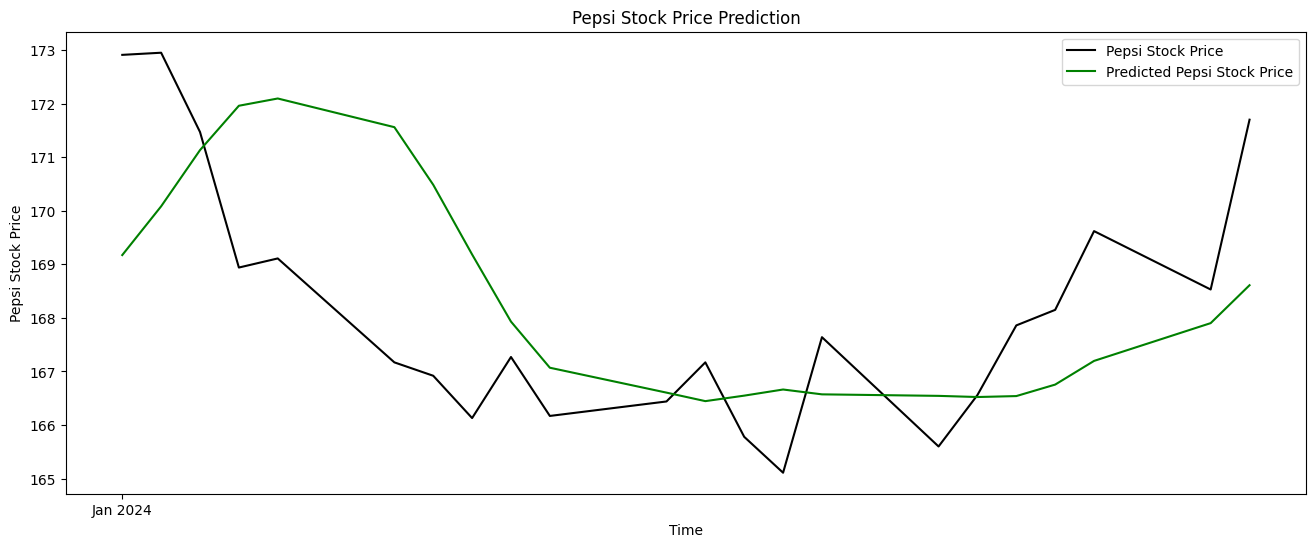

In [65]:
testing_model(pepsi_df, pepsi_model, 'Pepsi')

APPLE STOCK PRICE

Epoch 1/100
38/38 [==============================] - 9s 52ms/step - loss: 0.0395 - val_loss: 0.0195
Epoch 2/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0086 - val_loss: 0.0144
Epoch 3/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0120
Epoch 4/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0073 - val_loss: 0.0131
Epoch 5/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0078 - val_loss: 0.0166
Epoch 7/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0069 - val_loss: 0.0123
Epoch 8/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0066 - val_loss: 0.0088
Epoch 9/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0067 - val_loss: 0.0093
Epoch 10/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0058 - val_loss: 0.0068

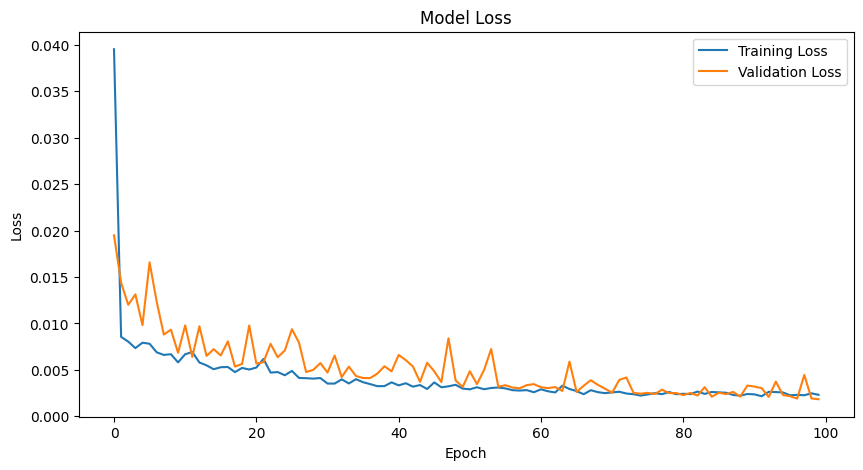

In [66]:
apple_df=data[data.symbol=='AAPL']
apple_model = stock_price_prediction_training(apple_df)

1/1 [==============================] - 1s 1s/step


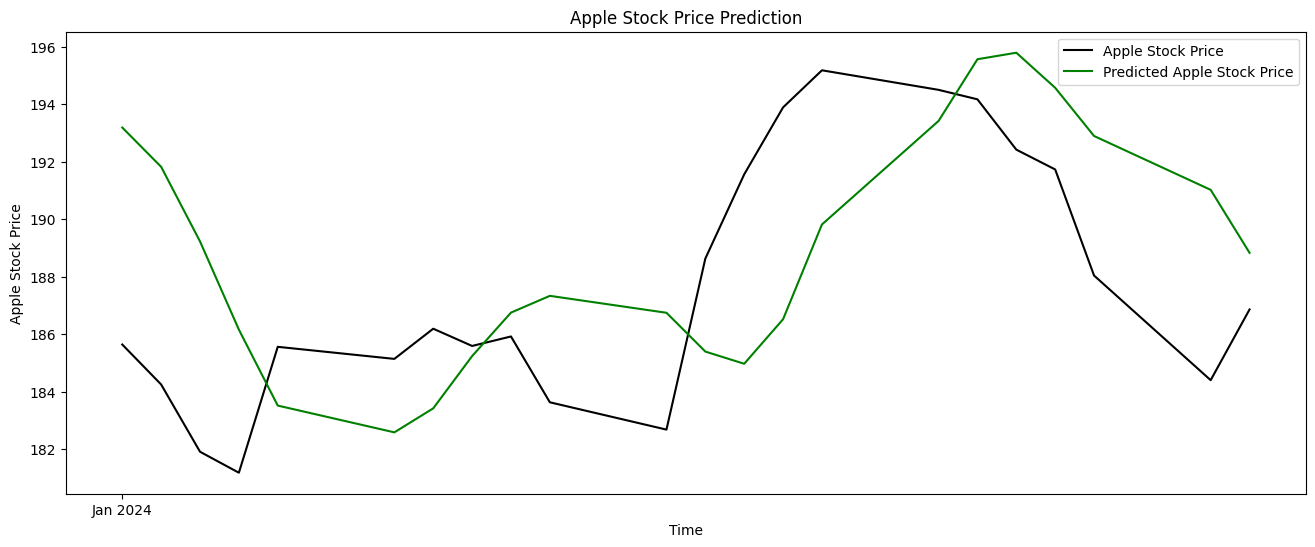

In [67]:
testing_model(apple_df, apple_model, 'Apple')

NETFLIX STOCK PRICE

Epoch 1/100
38/38 [==============================] - 9s 58ms/step - loss: 0.0344 - val_loss: 0.0250
Epoch 2/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0112 - val_loss: 0.0208
Epoch 3/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0087 - val_loss: 0.0205
Epoch 4/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0087 - val_loss: 0.0180
Epoch 5/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0094 - val_loss: 0.0197
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0080 - val_loss: 0.0171
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0075 - val_loss: 0.0181
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0067 - val_loss: 0.0149
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0086 - val_loss: 0.0245
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0080 - val_loss: 0.0232

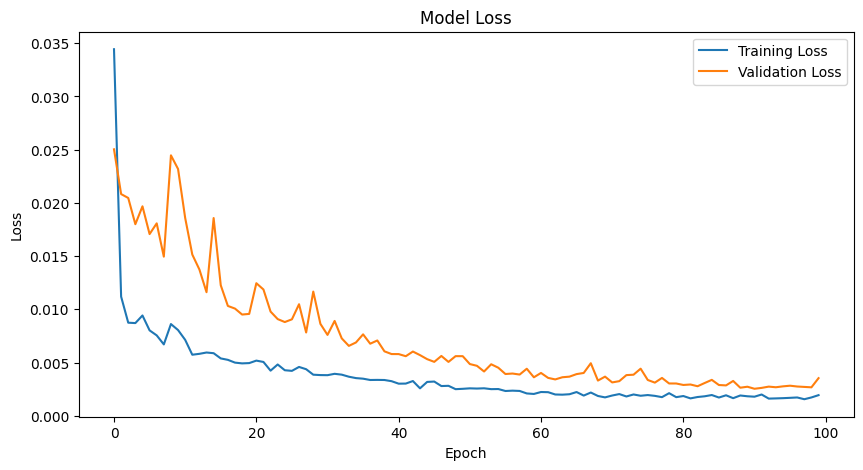

In [68]:
netflix_df=data[data.symbol=='NFLX']
netflix_model = stock_price_prediction_training(netflix_df)

1/1 [==============================] - 2s 2s/step


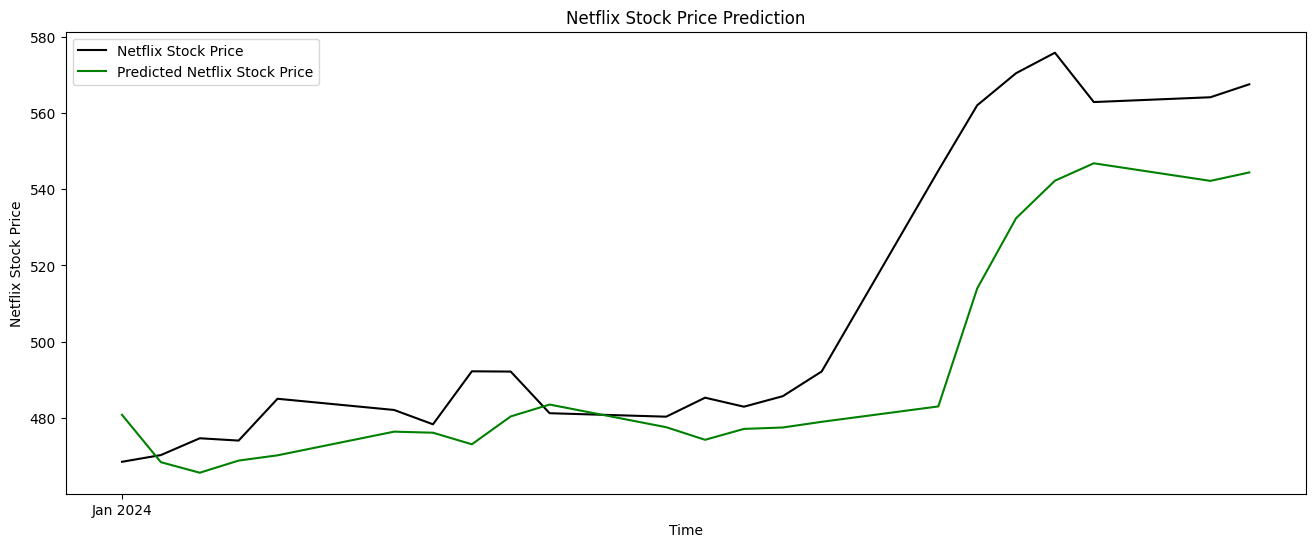

In [69]:
testing_model(netflix_df, netflix_model, 'Netflix')

ORACLE STOCK PRICE

Epoch 1/100
38/38 [==============================] - 13s 148ms/step - loss: 0.0244 - val_loss: 0.0280
Epoch 2/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0077 - val_loss: 0.0237
Epoch 3/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0068 - val_loss: 0.0243
Epoch 4/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0063 - val_loss: 0.0211
Epoch 5/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0063 - val_loss: 0.0212
Epoch 6/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0055 - val_loss: 0.0203
Epoch 7/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0054 - val_loss: 0.0184
Epoch 8/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0061 - val_loss: 0.0203
Epoch 9/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0050 - val_loss: 0.0168
Epoch 10/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0044 - val_loss: 0.01

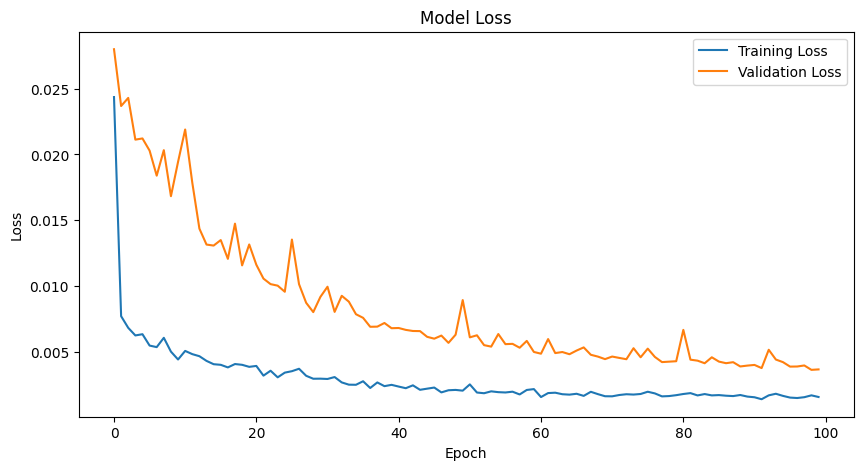

In [70]:
oracle_df=data[data.symbol=='ORCL']
oracle_model = stock_price_prediction_training(oracle_df)

1/1 [==============================] - 1s 1s/step


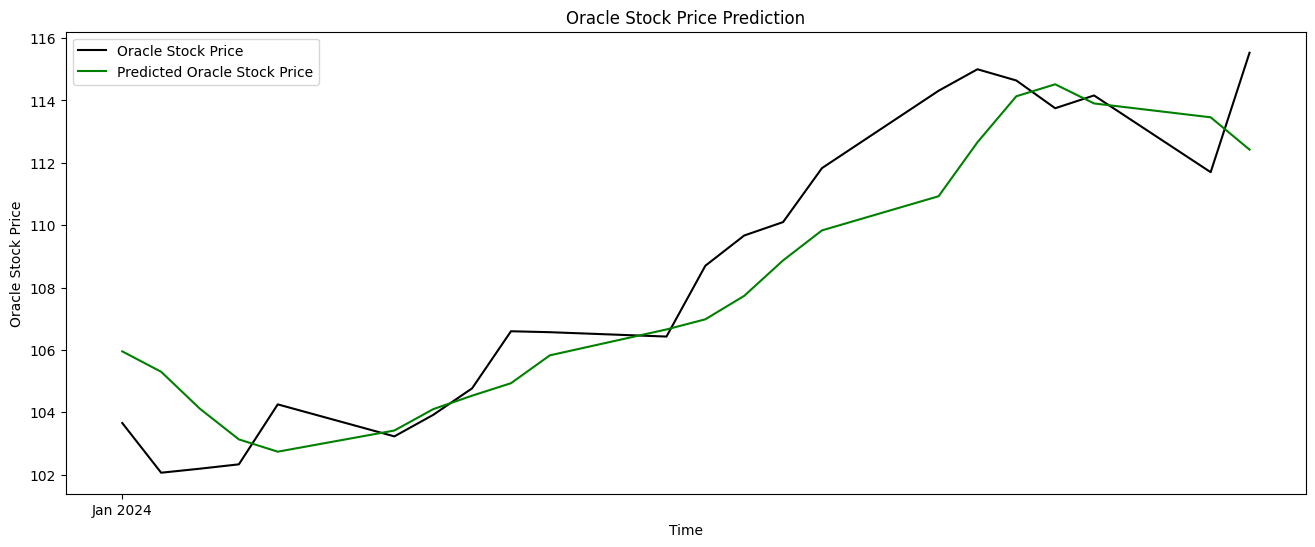

In [71]:
testing_model(oracle_df, oracle_model, 'Oracle')

TESLA STOCK PRICE

Epoch 1/100
38/38 [==============================] - 9s 66ms/step - loss: 0.0290 - val_loss: 0.0208
Epoch 2/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0162
Epoch 3/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0068 - val_loss: 0.0175
Epoch 4/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0072 - val_loss: 0.0224
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0066 - val_loss: 0.0122
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0063 - val_loss: 0.0124
Epoch 7/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0052 - val_loss: 0.0105
Epoch 8/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0054 - val_loss: 0.0127
Epoch 9/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0055 - val_loss: 0.0165
Epoch 10/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0054 - val_loss: 0.0171

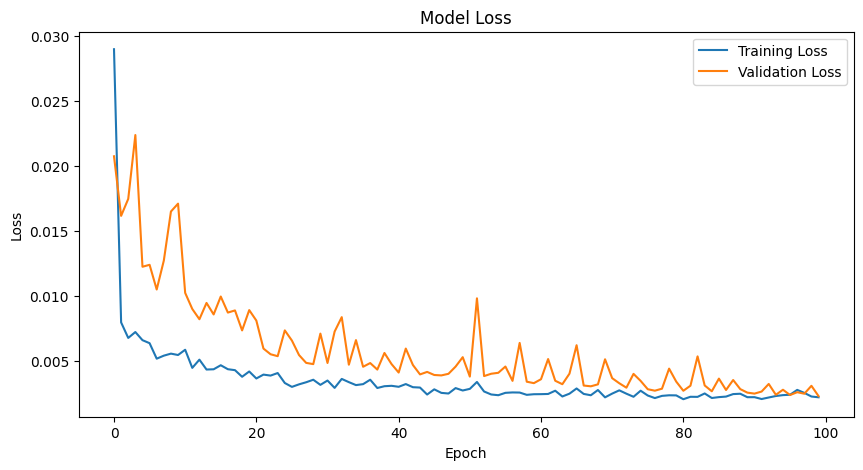

In [72]:
tesla_df=data[data.symbol=='TSLA']
tesla_model = stock_price_prediction_training(tesla_df)

1/1 [==============================] - 1s 1s/step


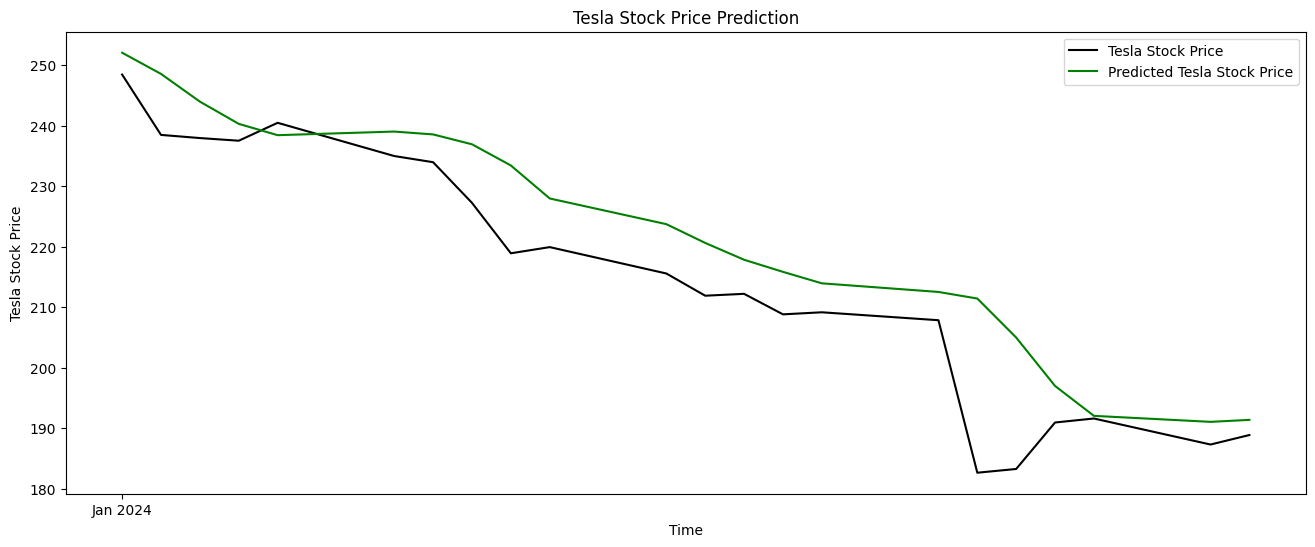

In [73]:
testing_model(tesla_df, tesla_model, 'Tesla')

META STOCK PRICE

Epoch 1/100
38/38 [==============================] - 9s 52ms/step - loss: 0.0361 - val_loss: 0.0059
Epoch 2/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0105 - val_loss: 0.0088
Epoch 3/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0094 - val_loss: 0.0071
Epoch 4/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0083 - val_loss: 0.0036
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0065 - val_loss: 0.0035
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 9/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0066 - val_loss: 0.0105

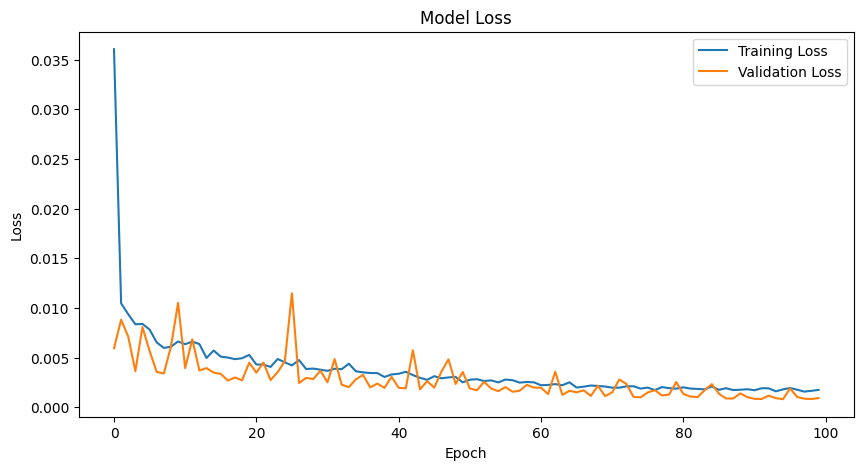

In [74]:
meta_df=data[data.symbol=='META']
meta_model = stock_price_prediction_training(meta_df)

1/1 [==============================] - 1s 1s/step


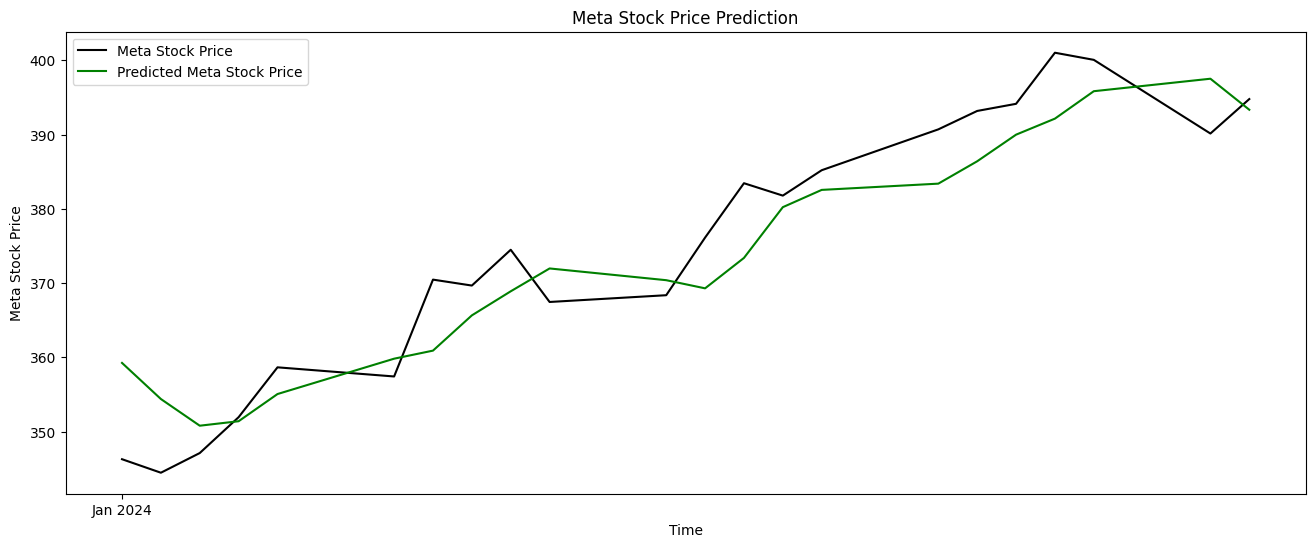

In [75]:
testing_model(meta_df, meta_model, 'Meta')

NVIDA STOCK PRICE

Epoch 1/100
38/38 [==============================] - 8s 50ms/step - loss: 0.0204 - val_loss: 0.0279
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0069 - val_loss: 0.0086
Epoch 3/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0054 - val_loss: 0.0112
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0046 - val_loss: 0.0156
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0049 - val_loss: 0.0063
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0047 - val_loss: 0.0074
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0049 - val_loss: 0.0155
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0040 - val_loss: 0.0064
Epoch 9/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0043 - val_loss: 0.0070
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0039 - val_loss: 0.0079

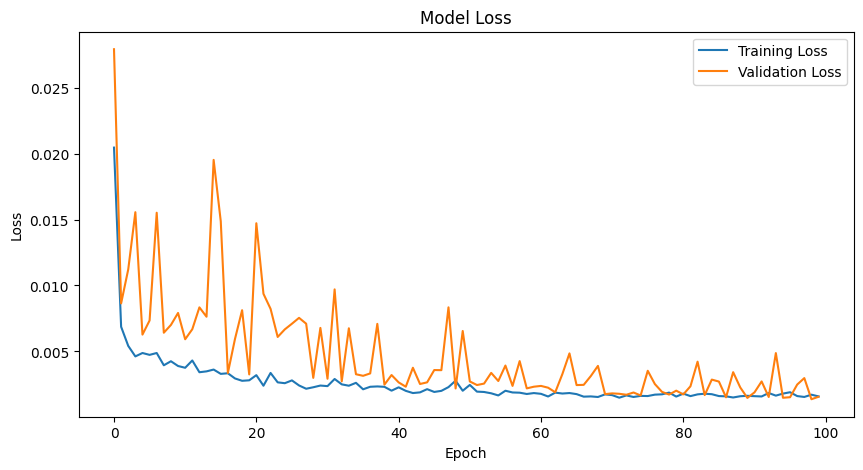

In [76]:
nvida_df=data[data.symbol=='NVDA']
nvida_model = stock_price_prediction_training(nvida_df)

1/1 [==============================] - 2s 2s/step


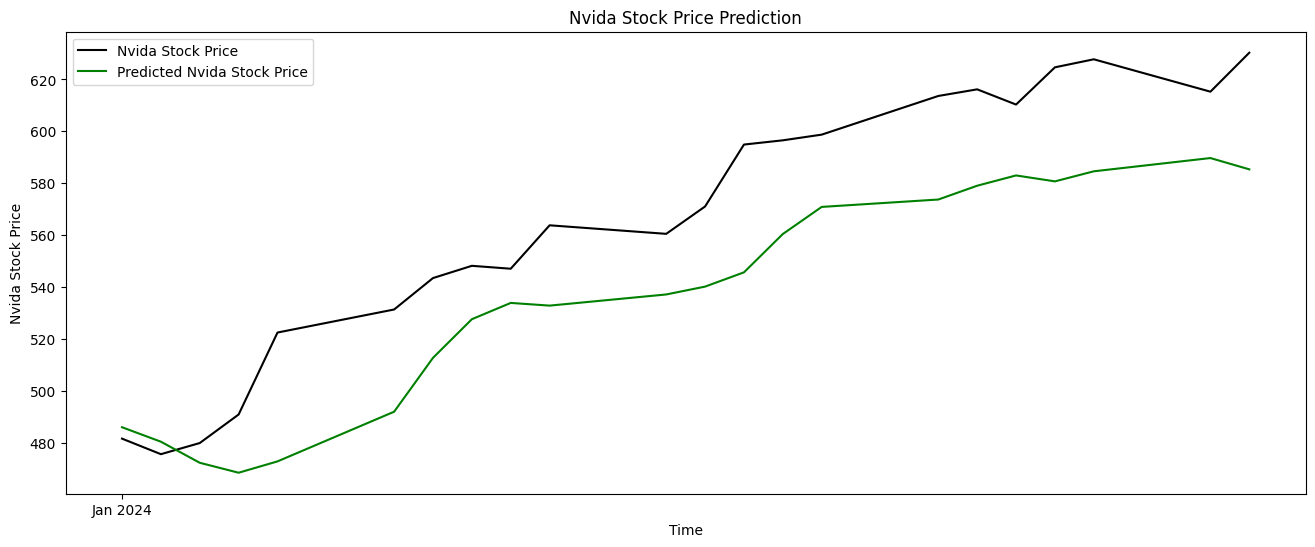

In [78]:
testing_model(nvida_df, nvida_model, 'Nvida')

AMAZON STOCK PRICE

Epoch 1/100
38/38 [==============================] - 9s 51ms/step - loss: 0.0415 - val_loss: 0.0235
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0120 - val_loss: 0.0080
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0118 - val_loss: 0.0077
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0093 - val_loss: 0.0109
Epoch 6/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0097 - val_loss: 0.0086
Epoch 7/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0084 - val_loss: 0.0112
Epoch 8/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0085 - val_loss: 0.0052
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0085 - val_loss: 0.0100

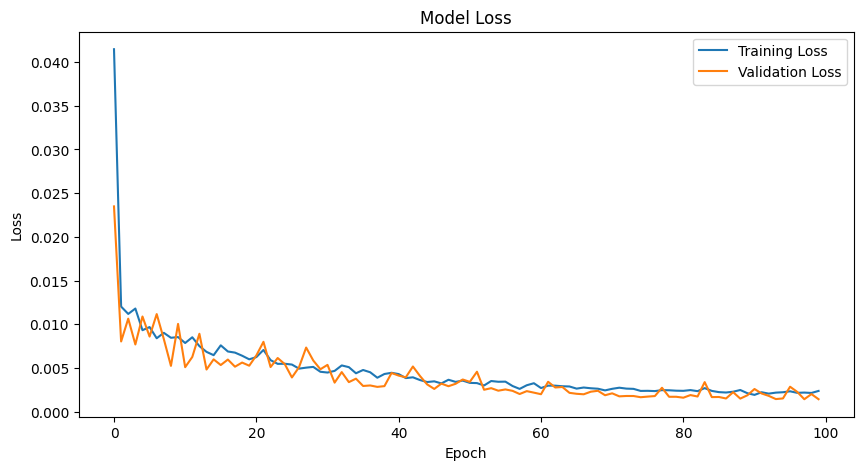

In [79]:
amazon_df=data[data.symbol=='AMZN']
amazon_model = stock_price_prediction_training(amazon_df)

1/1 [==============================] - 2s 2s/step


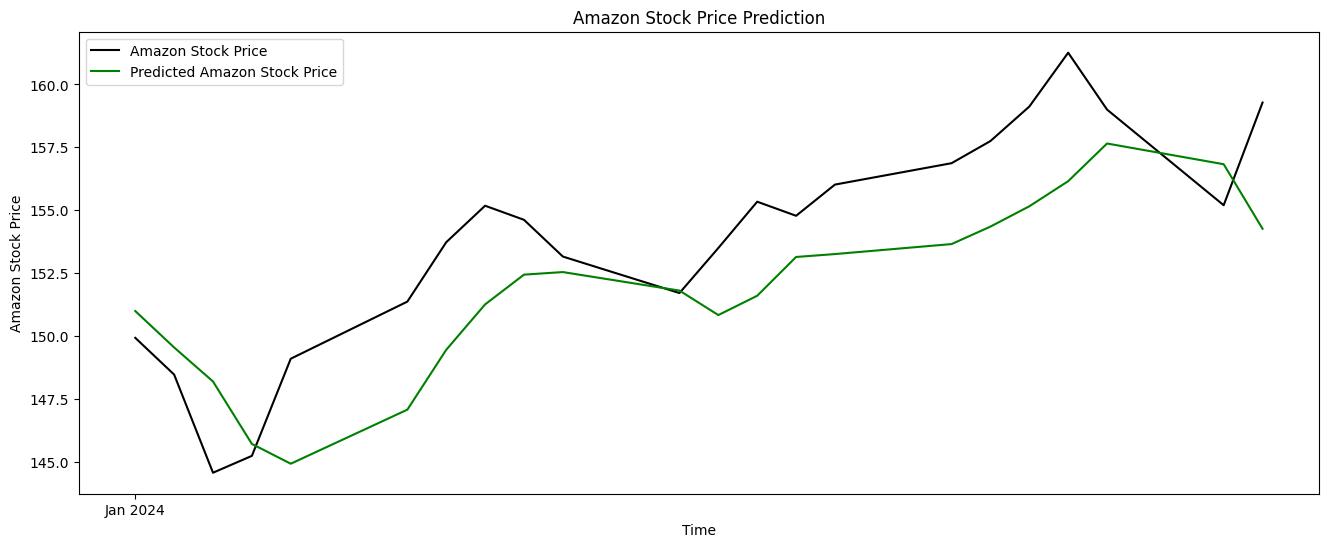

In [80]:
testing_model(amazon_df, amazon_model, 'Amazon')

MICROSOFT STOCK PRICE

Epoch 1/100
38/38 [==============================] - 9s 53ms/step - loss: 0.0284 - val_loss: 0.0101
Epoch 2/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0076 - val_loss: 0.0109
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0074 - val_loss: 0.0070
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0068 - val_loss: 0.0108
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0063 - val_loss: 0.0155
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0064 - val_loss: 0.0071
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 10/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0063 - val_loss: 0.0054

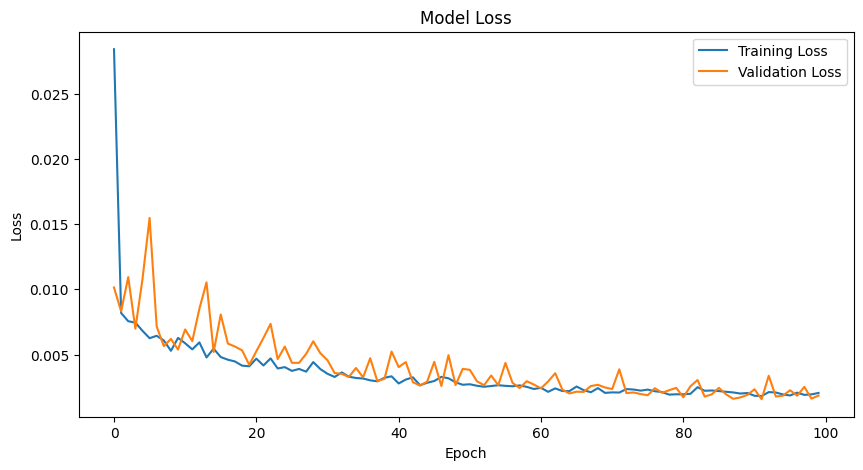

In [81]:
microsoft_df=data[data.symbol=='MSFT']
microsoft_model = stock_price_prediction_training(microsoft_df)

1/1 [==============================] - 1s 1s/step


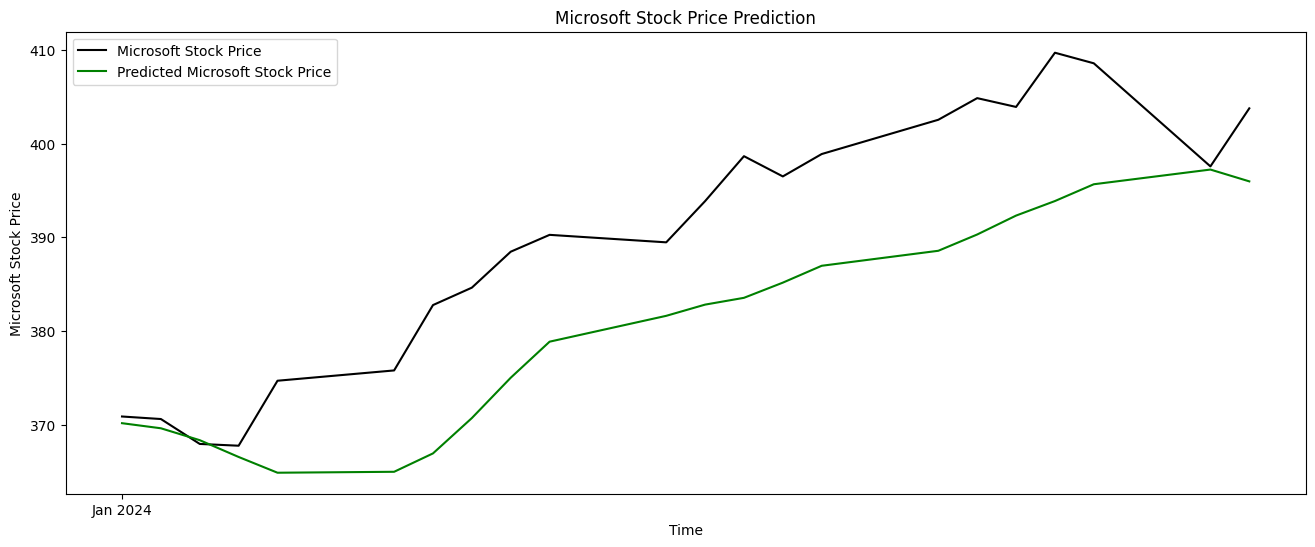

In [82]:
testing_model(microsoft_df, microsoft_model, 'Microsoft')

In [51]:
data.symbol.unique()

array(['GOOG', 'PEP', 'AAPL', 'NFLX', 'ORCL', 'TSLA', 'META', 'NVDA',
       'AMZN', 'MSFT'], dtype=object)